<a href="https://colab.research.google.com/github/shalusam07/MLDL/blob/main/ML_task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget -O drug200.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv

--2024-01-02 06:36:47--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6027 (5.9K) [text/csv]
Saving to: ‘drug200.csv’

drug200.csv         100%[===================>]   5.89K  --.-KB/s    in 0s      

2024-01-02 06:36:47 (1.70 GB/s) - ‘drug200.csv’ saved [6027/6027]



In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('drug200.csv')

In [ ]:
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [ ]:
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [ ]:
# making dummies
dummy_variable_sex = pd.get_dummies(data["Sex"])
# Concatenate
data = pd.concat([data, dummy_variable_sex], axis=1)
# Drop sex column
data.drop("Sex", axis = 1, inplace=True)

In [ ]:
y = data.iloc[:, -3].valuesy

array(['drugY', 'drugC', 'drugC', 'drugX', 'drugY', 'drugX', 'drugY',
       'drugC', 'drugY', 'drugY', 'drugC', 'drugY', 'drugY', 'drugY',
       'drugX', 'drugY', 'drugX', 'drugA', 'drugC', 'drugY', 'drugY',
       'drugY', 'drugY', 'drugY', 'drugY', 'drugY', 'drugY', 'drugX',
       'drugY', 'drugY', 'drugX', 'drugB', 'drugX', 'drugY', 'drugX',
       'drugX', 'drugA', 'drugX', 'drugX', 'drugX', 'drugY', 'drugB',
       'drugY', 'drugX', 'drugX', 'drugX', 'drugA', 'drugC', 'drugY',
       'drugY', 'drugY', 'drugX', 'drugY', 'drugY', 'drugB', 'drugC',
       'drugB', 'drugY', 'drugX', 'drugY', 'drugY', 'drugA', 'drugY',
       'drugX', 'drugB', 'drugY', 'drugA', 'drugX', 'drugY', 'drugY',
       'drugB', 'drugY', 'drugX', 'drugY', 'drugY', 'drugY', 'drugA',
       'drugY', 'drugA', 'drugX', 'drugB', 'drugX', 'drugC', 'drugA',
       'drugC', 'drugB', 'drugX', 'drugY', 'drugY', 'drugY', 'drugY',
       'drugY', 'drugY', 'drugY', 'drugY', 'drugX', 'drugY', 'drugY',
       'drugY', 'dru

In [ ]:
dataset = data.drop("Drug", axis = 1, inplace=False)

In [ ]:
print(dataset)

     Age      BP Cholesterol  Na_to_K  F  M
0     23    HIGH        HIGH   25.355  1  0
1     47     LOW        HIGH   13.093  0  1
2     47     LOW        HIGH   10.114  0  1
3     28  NORMAL        HIGH    7.798  1  0
4     61     LOW        HIGH   18.043  1  0
..   ...     ...         ...      ... .. ..
195   56     LOW        HIGH   11.567  1  0
196   16     LOW        HIGH   12.006  0  1
197   52  NORMAL        HIGH    9.894  0  1
198   23  NORMAL      NORMAL   14.020  0  1
199   40     LOW      NORMAL   11.349  1  0

[200 rows x 6 columns]


In [ ]:
# Converting dataframe into arrays
dataset_array = dataset.values
dataset_array

array([[23, 'HIGH', 'HIGH', 25.355, 1, 0],
       [47, 'LOW', 'HIGH', 13.093, 0, 1],
       [47, 'LOW', 'HIGH', 10.114, 0, 1],
       ...,
       [52, 'NORMAL', 'HIGH', 9.894, 0, 1],
       [23, 'NORMAL', 'NORMAL', 14.02, 0, 1],
       [40, 'LOW', 'NORMAL', 11.349, 1, 0]], dtype=object)

In [ ]:
# Using sklearn library's LabelEncoder class
from sklearn.preprocessing import LabelEncoder
le_BP = LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
dataset_array[:,1] = le_BP.transform(dataset_array[:,1])
dataset_array

array([[23, 0, 'HIGH', 25.355, 1, 0],
       [47, 1, 'HIGH', 13.093, 0, 1],
       [47, 1, 'HIGH', 10.114, 0, 1],
       ...,
       [52, 2, 'HIGH', 9.894, 0, 1],
       [23, 2, 'NORMAL', 14.02, 0, 1],
       [40, 1, 'NORMAL', 11.349, 1, 0]], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le_Chole = LabelEncoder()
le_Chole.fit([ 'LOW', 'NORMAL', 'HIGH'])
dataset_array[:,2] = le_Chole.transform(dataset_array[:,2])
X = dataset_array

Splitting dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
print(X_train)

[[28 2 0 19.675 1 0]
 [53 0 2 12.495 1 0]
 [18 0 0 37.188 1 0]
 [56 0 0 25.395 1 0]
 [22 1 0 8.151 0 1]
 [33 1 0 33.486 1 0]
 [18 2 2 8.75 1 0]
 [30 2 0 10.443 1 0]
 [73 2 0 19.221 1 0]
 [65 0 2 11.34 0 1]
 [52 1 2 32.922 0 1]
 [58 1 0 38.247 1 0]
 [59 2 0 13.884 1 0]
 [32 0 2 25.974 1 0]
 [72 1 2 14.642 1 0]
 [29 0 0 29.45 1 0]
 [68 0 2 10.189 1 0]
 [21 0 2 28.632 1 0]
 [67 2 2 10.898 0 1]
 [51 2 0 13.597 1 0]
 [69 2 0 10.065 1 0]
 [62 2 0 16.594 0 1]
 [35 0 0 12.894 1 0]
 [45 0 0 12.854 1 0]
 [39 0 0 9.664 0 1]
 [50 2 2 17.211 1 0]
 [23 2 0 16.85 0 1]
 [50 2 0 12.703 1 0]
 [49 2 2 9.381 1 0]
 [64 1 2 25.741 1 0]
 [47 0 0 10.403 0 1]
 [37 0 0 13.091 1 0]
 [51 0 2 11.343 0 1]
 [56 1 0 11.567 1 0]
 [72 0 2 9.677 0 1]
 [67 1 2 20.693 0 1]
 [47 1 0 10.114 0 1]
 [34 0 0 18.703 0 1]
 [55 0 0 10.977 1 0]
 [52 2 0 9.894 0 1]
 [23 2 0 12.26 0 1]
 [47 1 0 11.767 1 0]
 [46 0 0 34.686 1 0]
 [41 2 2 22.905 1 0]
 [16 1 0 12.006 0 1]
 [39 2 0 15.969 0 1]
 [73 0 0 18.348 1 0]
 [66 0 0 16.347 0 1]
 [4

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [ ]:
print(classifier.predict(sc.transform([[23, 1, 0, 7.297999999999999, 0, 1]])))

['drugC']


In [ ]:
import pandas as pd
import numpy as np


In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[['drugC' 'drugC']
 ['drugX' 'drugX']
 ['drugY' 'drugY']
 ['drugY' 'drugY']
 ['drugY' 'drugY']
 ['drugX' 'drugX']
 ['drugX' 'drugX']
 ['drugX' 'drugX']
 ['drugY' 'drugY']
 ['drugX' 'drugX']
 ['drugA' 'drugA']
 ['drugY' 'drugY']
 ['drugY' 'drugY']
 ['drugY' 'drugY']
 ['drugB' 'drugB']
 ['drugC' 'drugC']
 ['drugY' 'drugY']
 ['drugY' 'drugY']
 ['drugX' 'drugX']
 ['drugY' 'drugY']
 ['drugY' 'drugY']
 ['drugX' 'drugX']
 ['drugX' 'drugX']
 ['drugX' 'drugX']
 ['drugY' 'drugY']
 ['drugY' 'drugY']
 ['drugY' 'drugY']
 ['drugY' 'drugY']
 ['drugY' 'drugY']
 ['drugX' 'drugX']
 ['drugX' 'drugX']
 ['drugC' 'drugC']
 ['drugA' 'drugA']
 ['drugX' 'drugX']
 ['drugY' 'drugY']
 ['drugY' 'drugY']
 ['drugX' 'drugX']
 ['drugY' 'drugY']
 ['drugA' 'drugA']
 ['drugX' 'drugX']
 ['drugY' 'drugY']
 ['drugA' 'drugA']
 ['drugY' 'drugY']
 ['drugX' 'drugX']
 ['drugY' 'drugY']
 ['drugX' 'drugX']
 ['drugY' 'drugY']
 ['drugY' 'drugY']
 ['drugA' 'drugA']
 ['drugY' 'drugY']]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred, labels=['drugA','drugB','drugC','drugX','drugY'])
print(cm)
print('Accuracy is',accuracy_score(y_test, y_pred))

[[ 5  0  0  0  0]
 [ 0  1  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0 16  0]
 [ 0  0  0  0 25]]
Accuracy is 1.0


In [ ]:
# Checking contents of Labels in y_test array
pd.DataFrame(y_test, columns=['Drug']).groupby('Drug').size()

Drug
drugA     5
drugB     1
drugC     3
drugX    16
drugY    25
dtype: int64

In [ ]:
import itertools
import matplotlib.pyplot as plt
# Defining th function for plotting Confusion Matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 5  0  0  0  0]
 [ 0  1  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0 16  0]
 [ 0  0  0  0 25]]


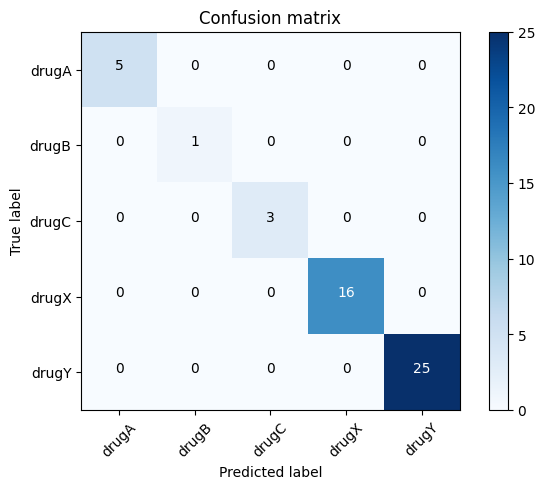

In [ ]:
plt.figure()
plot_confusion_matrix(cm, classes=['drugA','drugB','drugC','drugX','drugY'],normalize= False,  title='Confusion matrix')